# <center> Самостоятельная работа
## <center> Предсказание средней стоимости жилья на основе RandomForest
### _Работу выполнили студенты 1гр.2п.гр. Стецук Максим и Каргаполов Денис_

In [1]:
# Игнорирование предупреждений
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Импорт библиотек
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

### <center> _Подготовка данных_

In [3]:
# Чтение данных
data = pd.read_csv('../data/data_for_practice.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


__*Пояснение значений столбцов*__  
| Имя столбца | Значение |
|-----------|--------|
| longitude | Долгота местоположения недвижимости |
|latitude| Широта местоположения недвижимости |
|housing_median_age| Медианный возраст жилья в районе |
|total_rooms| Общее количество комнат в районе |
|total_bedrooms| Общее количество спален в районе |
|population| Общая численность населения в районе |
|households| Общее количество домохозяйств в районе |
|median_income| Медианный доход домохозяйства в районе |
|median_house_value| Медианная стоимость домов в районе |

In [4]:
# Размеры таблицы данных
print(data.shape)

(17000, 9)


In [5]:
# Проверка наличия пропусков
display(data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [6]:
# Факторы и целевой признак
features = data.drop('median_house_value', axis=1).columns
X, y = data[features], data['median_house_value']

In [7]:
# Разбиение на тренировочную и тестовую выборки с помощью train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Вывод размеров полученных выборок
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (13600, 8)
Test shape: (3400, 8)


In [8]:
# Функция для подсчета метрик R^2, MAE, MAPE, MSE, RMSE
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('Train MSE: {:.3f}'.format(metrics.mean_squared_error(y_train, y_train_predict, squared=True)))
    print('Train RMSE: {:.3f}'.format(metrics.mean_squared_error(y_train, y_train_predict, squared=False)))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))
    print('Test MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_test_predict, squared=True)))
    print('Test RMSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_test_predict, squared=False)))

### <center> _Подбор гиперпараметров_

In [9]:
# Задаем пространство поиска гиперпараметров
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Создаем модель случайного леса
rf_model = ensemble.RandomForestRegressor()

# Используем случайный поиск с кросс-валидацией
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions, n_iter=20, cv=3, verbose=0, random_state=42, n_jobs=-1)

# Обучаем модель
random_search.fit(X_train, y_train)

# Получаем лучшие гиперпараметры
best_params = random_search.best_params_

print("Лучшие гиперпараметры:", random_search.best_params_)

Лучшие гиперпараметры: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}


### <center> _Создание и обучение модели_

In [10]:
# Создание модели случайного леса
random_forest_model = ensemble.RandomForestRegressor(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=20
)
random_forest_model

RandomForestRegressor(max_depth=20, max_features='log2', min_samples_split=5)

In [11]:
#Обучаем модель
random_forest_model.fit(X_train, y_train)
random_forest_model

RandomForestRegressor(max_depth=20, max_features='log2', min_samples_split=5)

In [12]:
#Делаем предсказание для каждой из выборок
y_train_predicted = random_forest_model.predict(X_train)
y_test_predicted = random_forest_model.predict(X_test)

In [13]:
# Получим значения метрик
print_metrics(y_train, y_train_predicted, y_test, y_test_predicted)

Train R^2: 0.956
Train MAE: 16105.801
Train MAPE: 9.145
Train MSE: 581671848.960
Train RMSE: 24117.874


Test R^2: 0.816
Test MAE: 33703.432
Test MAPE: 18.774
Test MSE: 2530555646.040
Test RMSE: 50304.628


### <center> _Графики для тренировочной и тестовой выборок_

Text(0.5, 1.0, 'Train dataset')

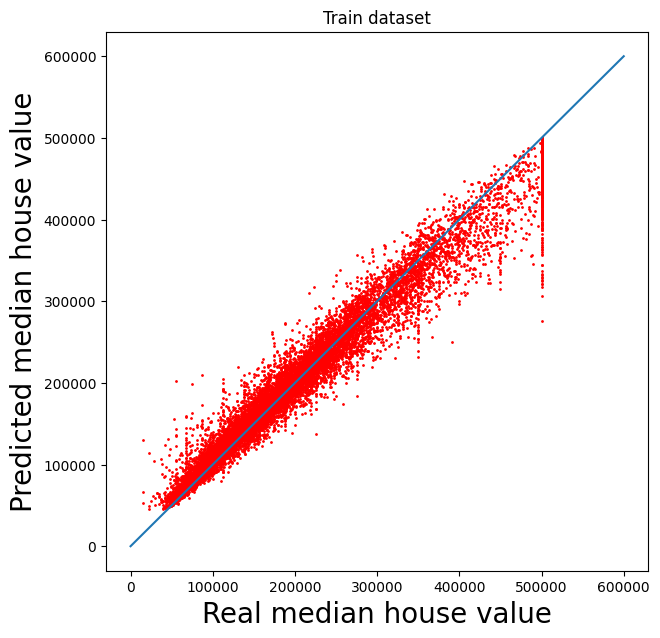

In [14]:
# Предсказанные значения для тренировочной выборки от реальных
%matplotlib inline
plt.figure(figsize=(7, 7))
plt.scatter(y_train, y_train_predicted, s=1, c='r')
plt.plot([0, 0.6 * 10**6], [0, 0.6 * 10**6])
plt.xlabel('Real median house value', fontsize=20)
plt.ylabel('Predicted median house value', fontsize=20)
plt.title('Train dataset')

Text(0.5, 1.0, 'Test dataset')

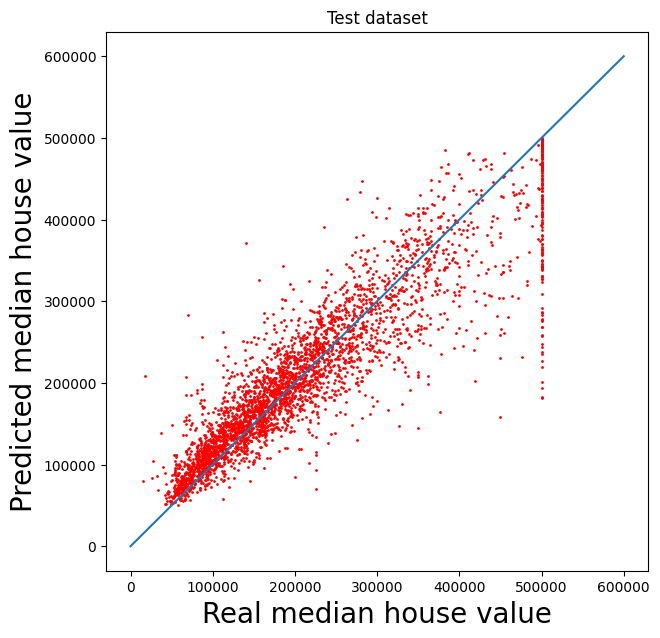

In [15]:
# Предсказанные значения для тестовой выборки от реальных
%matplotlib inline
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_test_predicted, s=1, c='r')
plt.plot([0, 0.6 * 10**6], [0, 0.6 * 10**6])
plt.xlabel('Real median house value', fontsize=20)
plt.ylabel('Predicted median house value', fontsize=20)
plt.title('Test dataset')

### <center> _Оценка важности фич_

In [16]:
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='log2', min_samples_split=5)

In [17]:
# Значимость фич
random_forest_model.feature_importances_

array([0.16081166, 0.15998302, 0.05509288, 0.04001432, 0.03695789,
       0.05268727, 0.03491756, 0.4595354 ])

In [18]:
X_train.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [19]:
# Таблица значимости признаков
feature_importance = pd.DataFrame(columns = ['Название признака', 'Важность признака'])

feature_importance['Название признака'] = X_train.keys()
feature_importance['Важность признака'] = random_forest_model.feature_importances_

feature_importance.sort_values(by='Важность признака', ascending=False)

,Название признака,Важность признака
7,median_income,0.459535
0,longitude,0.160812
1,latitude,0.159983
2,housing_median_age,0.055093
5,population,0.052687
3,total_rooms,0.040014
4,total_bedrooms,0.036958
6,households,0.034918


### <center> _Обучение и оценка качества модели без малозначимых фич_

In [20]:
# Повторно загрузим данные
data_w_f = pd.read_csv('../data/data_for_practice.csv')
data_w_f.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [21]:
# Удалим столбцы с минимальной значимостью
columns_to_drop = ['households', 'total_bedrooms']

data_w_f.drop(columns=columns_to_drop, inplace=True)

data_w_f.head()

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1015.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1129.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,333.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,515.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,624.0,1.9250,65500.0


In [22]:
# Размеры таблицы данных
print(data_w_f.shape)

(17000, 7)


In [23]:
# Факторы и целевой признак
features = data_w_f.drop('median_house_value', axis=1).columns
X, y = data_w_f[features], data_w_f['median_house_value']

# Разбиение на тренировочную и тестовую выборки с помощью train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Вывод размеров полученных выборок
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (13600, 6)
Test shape: (3400, 6)


In [24]:
#Обучаем модель
random_forest_model.fit(X_train, y_train)
random_forest_model

RandomForestRegressor(max_depth=20, max_features='log2', min_samples_split=5)

In [25]:
#Делаем предсказание для каждой из выборок
y_train_predicted = random_forest_model.predict(X_train)
y_test_predicted = random_forest_model.predict(X_test)

In [26]:
# Получим значения метрик
print_metrics(y_train, y_train_predicted, y_test, y_test_predicted)

Train R^2: 0.953
Train MAE: 16747.253
Train MAPE: 9.483
Train MSE: 629411457.092
Train RMSE: 25088.074


Test R^2: 0.820
Test MAE: 33431.693
Test MAPE: 18.785
Test MSE: 2479148154.248
Test RMSE: 49791.045


Сравнивая значения метрик полученных для полного датасета и датасета с отброшенными малозначазами фичами видно, что второй случай дает большие ошибки, то есть качество модели снижается. Следовательно, данные фичи все таки следует использовать при обучении созданной модели случайного леса.

### <center> _Графики_

Text(0.5, 1.0, 'Train dataset')

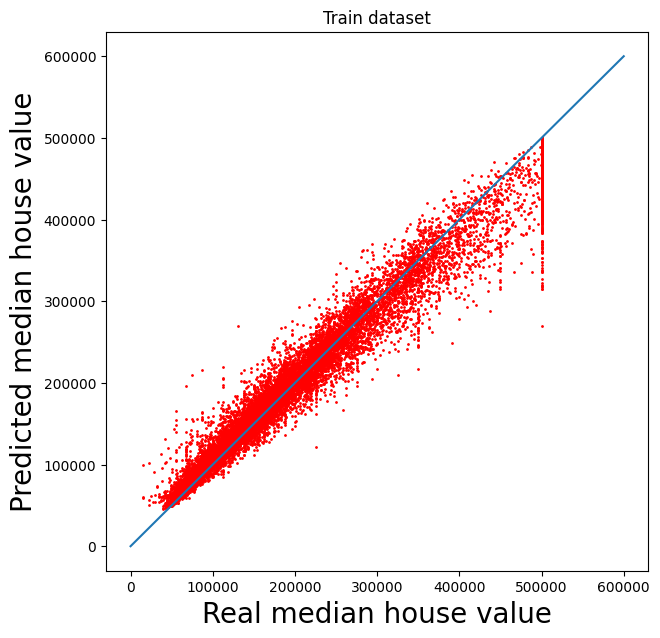

In [27]:
# Предсказанные значения для тренировочной выборки от реальных
%matplotlib inline
plt.figure(figsize=(7, 7))
plt.scatter(y_train, y_train_predicted, s=1, c='r')
plt.plot([0, 0.6 * 10**6], [0, 0.6 * 10**6])
plt.xlabel('Real median house value', fontsize=20)
plt.ylabel('Predicted median house value', fontsize=20)
plt.title('Train dataset')

Text(0.5, 1.0, 'Test dataset')

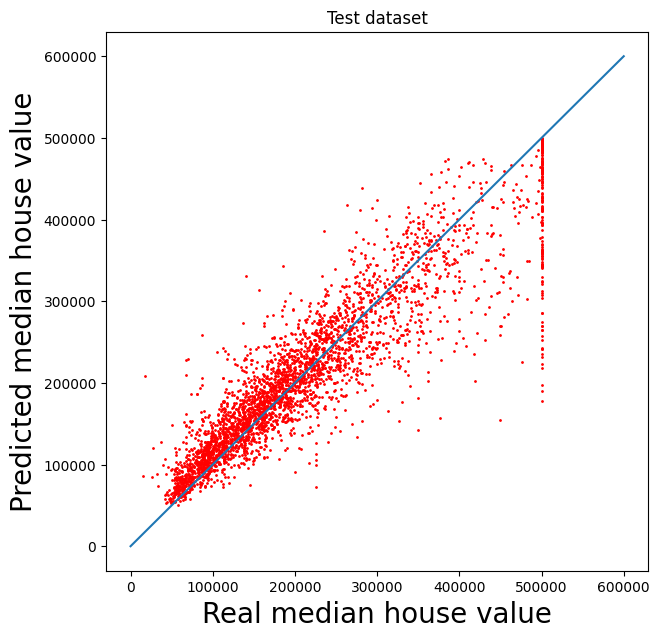

In [28]:
# Предсказанные значения для тестовой выборки от реальных
%matplotlib inline
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_test_predicted, s=1, c='r')
plt.plot([0, 0.6 * 10**6], [0, 0.6 * 10**6])
plt.xlabel('Real median house value', fontsize=20)
plt.ylabel('Predicted median house value', fontsize=20)
plt.title('Test dataset')